# 4.7.1 데이터 추가 처리

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv('/content/drive/MyDrive/기말고사 과제/House Data Cleaning 2.csv')
df.shape

(8751, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8751 entries, 0 to 8750
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented Bike Count  8751 non-null   int64  
 1   Temperature        8751 non-null   float64
 2   Humidity           8751 non-null   float64
 3   Wind speed         8751 non-null   float64
 4   Visibility         8751 non-null   int64  
 5   Solar Radiation    8751 non-null   float64
 6   Rented Bike B      8751 non-null   float64
 7   Date               8751 non-null   float64
 8   Hour               8751 non-null   float64
 9   Seasons            8751 non-null   float64
 10  Functioning Day    8751 non-null   float64
 11  Holiday            8751 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 820.5 KB


In [ ]:
df.dtypes

Rented Bike Count      int64
Temperature          float64
Humidity             float64
Wind speed           float64
Visibility             int64
Solar Radiation      float64
Rented Bike B        float64
Date                 float64
Hour                 float64
Seasons              float64
Functioning Day      float64
Holiday              float64
dtype: object

In [ ]:
df.isna().any()[lambda x: x]   # 결측값을 갖고 있는 변수명(컬럼명) 찾기

Series([], dtype: bool)

In [ ]:
# 데이터프레임 df에 있는 모든 컬럼(변수)의 결측값 보유 비율을 확인

df.isnull().mean().sort_values(ascending=False) # 결측값 비율을 내림차순으로 보여주기

Rented Bike Count    0.0
Temperature          0.0
Humidity             0.0
Wind speed           0.0
Visibility           0.0
Solar Radiation      0.0
Rented Bike B        0.0
Date                 0.0
Hour                 0.0
Seasons              0.0
Functioning Day      0.0
Holiday              0.0
dtype: float64

In [ ]:
df.to_csv('/content/drive/MyDrive/기말고사 과제/2017DC1-all.csv', index=False)

In [ ]:
df_with_VALP_B1 = df.drop(['Rented Bike Count'], axis=1)   # 타겟변수 VALP를 제외한 변수를 저장
df_with_VALP_B1.shape

(8751, 11)

In [ ]:
df_with_VALP_B1.to_csv('/content/drive/MyDrive/기말고사 과제/2017DC1.csv', index=False)

# 4.7.2 데이터 분할 및 대체

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('2017DC1.csv')
df.shape

(8751, 11)

In [ ]:
# 참조 코딩
df.dtypes

Temperature        float64
Humidity           float64
Wind speed         float64
Visibility           int64
Solar Radiation    float64
Rented Bike B      float64
Date               float64
Hour               float64
Seasons            float64
Functioning Day    float64
Holiday            float64
dtype: object

In [ ]:
# 참조 코딩
# 범주형 변수를 cols1에 저장.
cols = ['Date','Hour','Seasons','Functioning Day','Holiday','Rented Bike B']

# 범주형 변수의 dtype을 category로 변경
df[cols] = df[cols].astype('category')
df.dtypes

Temperature         float64
Humidity            float64
Wind speed          float64
Visibility            int64
Solar Radiation     float64
Rented Bike B      category
Date               category
Hour               category
Seasons            category
Functioning Day    category
Holiday            category
dtype: object

In [ ]:
data = df.drop(['Rented Bike B'], axis=1)   # 타겟변수를 제외한 입력변수를 data에 저장
target = df['Rented Bike B']                # 타겟변수만 target에 저장

In [ ]:
data.shape

(8751, 10)

In [ ]:
target.shape

(8751,)

In [ ]:
# 50:50 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=42)   # test_size=0.5임에 주의

# 4.7.3 Random Forest 모델

In [ ]:
# Random Forest 모델 (Default 모델, tree depth 제한 없음)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
rf = RandomForestRegressor(n_estimators = 100, random_state=0)
model = rf.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성
#accuracy = accuracy_score(y_test, pred)

print ("Random Forest Accuracy on training set:{:.5f}".format(model.score(X_train, y_train)))
print ("Random Forest Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Random Forest Accuracy on training set:1.00000
Random Forest Accuracy on test set:0.91865


In [ ]:
# Random Forest 모델 (Default 모델, tree depth 제한 없음)
rf = RandomForestClassifier(n_estimators = 100, random_state=0)

In [ ]:
# 그리드 서치 실행

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정
cross_validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
params = {'max_depth': range(10, 41), 'n_estimators': [100, 200]}

# GridSearchCV의 cv=cross_validation 옵션값은 위의 StratifiedKFold의 random_state 옵션값을 적용시켜서
# GridSearchCV를 실행핼 때마다 결과가 항상 동일하게 나오도록 보장
grid_rf = GridSearchCV(rf, param_grid=params, scoring='accuracy', cv=cross_validation,
                       verbose=1, n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_rf.best_score_))
print("GridSearchCV best parameter:", (grid_rf.best_params_))

Fitting 5 folds for each of 62 candidates, totalling 310 fits
GridSearchCV max accuracy:0.92297
GridSearchCV best parameter: {'max_depth': 18, 'n_estimators': 200}


In [ ]:
best_clf = grid_rf.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.91659
ROC AUC on test set:0.97850


In [ ]:
# 참조 코딩
print ("Feature importances:")
print (best_clf.feature_importances_)

Feature importances:
[0.21270124 0.12846171 0.04706336 0.05992663 0.08806403 0.02348034
 0.21404536 0.15493218 0.06763655 0.00368861]


In [ ]:
# 변수명을 Index로 만들고 feature_importances를 매칭해서 나열한 데이터프레임 만들기

feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(np.round(best_clf.feature_importances_, 3), index=feature_names,
                   columns=['Feature_importances'])
dft1 = dft.sort_values(by='Feature_importances', ascending=False)
dft1                                 # 컬럼 Feature_importances의 값들을 내림차순으로 정리

,Feature_importances
Hour,0.214
Temperature,0.213
Seasons,0.155
Humidity,0.128
Solar Radiation,0.088
Functioning Day,0.068
Visibility,0.060
Wind speed,0.047
Date,0.023
Holiday,0.004


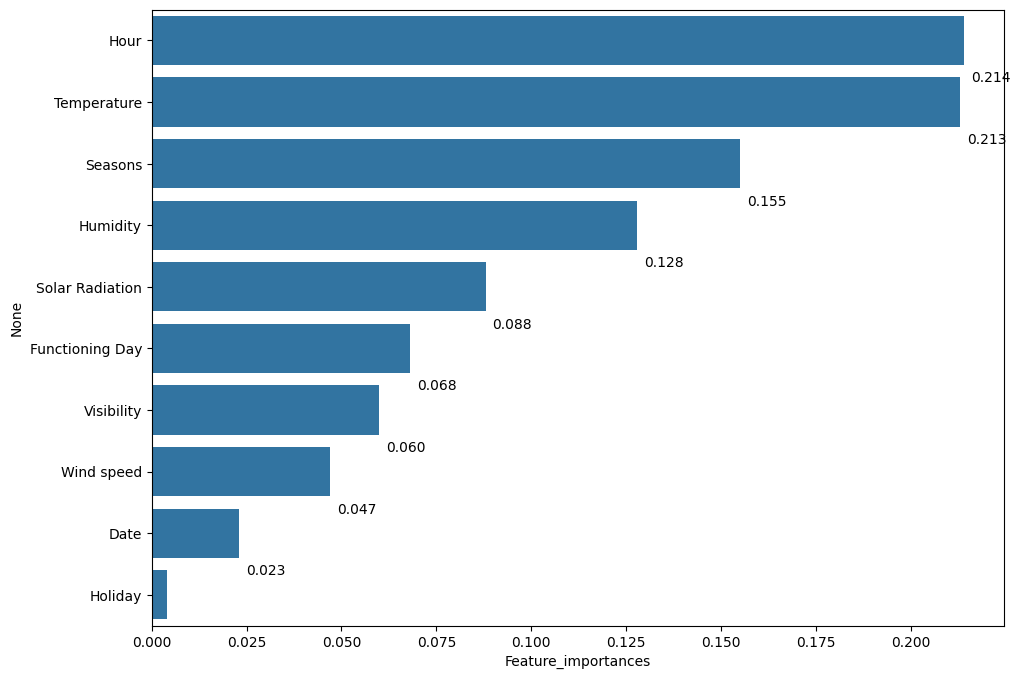

In [ ]:
# 데이터프레임 dft1의 막대그래프(barplot) 그리기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(11, 8))
ax = sns.barplot(y=dft1.index, x="Feature_importances", data=dft1)

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()+1.3),
                xytext=(5, 10), textcoords='offset points')

In [ ]:
# 참고 코딩

In [ ]:
# 70:30 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.3, random_state=42)   # test_size=0.5임에 주의

In [ ]:
# Random Forest 모델 (Default 모델, tree depth 제한 없음)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators = 100, random_state=0)
model = rf.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성
accuracy = accuracy_score(y_test, pred)

print ("Random Forest Accuracy on training set:{:.5f}".format(model.score(X_train, y_train)))
print ("Random Forest Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Random Forest Accuracy on training set:1.00000
Random Forest Accuracy on test set:0.93031
